In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 scatter graph
* n개의 **짝으로 이루어진 자료**(컬럼이 2개 이상)를 
* x, y 평면에 **점으로 나타낸 그래프**
* 자료의 **분포정도**를 파악하는데 사용
* 주로 **상관/회귀분석**에 사용
* scatter(x축, y축, 옵션)

In [8]:
# 약물 투여에 따른 환자 반응
age = [23, 30, 40, 45, 60]
drugA = [16,20,27,40,60]
drugB = [15,18,25,31,40]

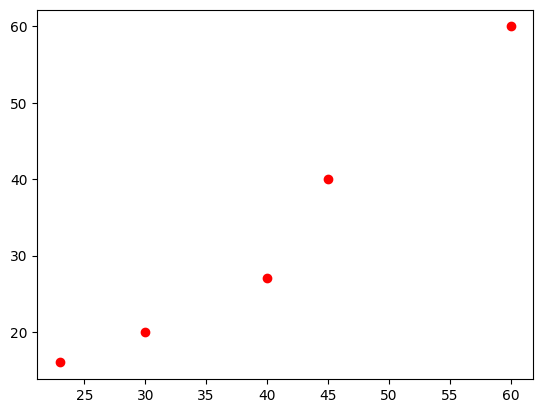

In [9]:
plt.scatter(age, drugA,color='red')
plt.show()

## 회귀계수를 이용한 예측선 그리기
+ polyfit(x축,y축,다항수차수) => 기울기, 절편

In [10]:
# A약물 투여 예측 : y = ax + b
a, b = np.polyfit(age,drugA,1).round(2)
a,b

(1.22, -15.77)

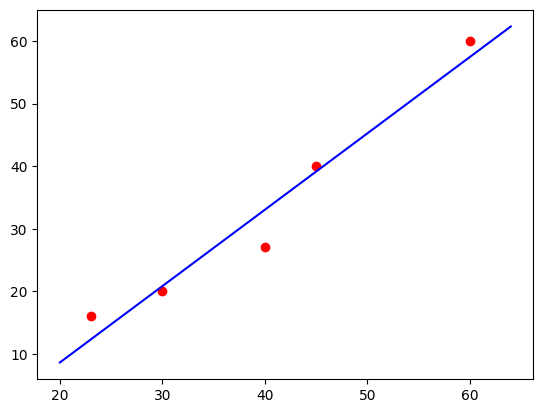

In [11]:
# 예측선 시각화
plt.scatter(age, drugA, color='red')

x = np.arange(20,65, 1)
y = a*x + b     # 예측을 위한 직선방정식
plt.plot(x,y,'b')
plt.show()

In [40]:
# 예측선 시각화 - B약물

In [12]:
a, b = np.polyfit(age,drugB,1).round(2)
a,b

(0.7, -2.03)

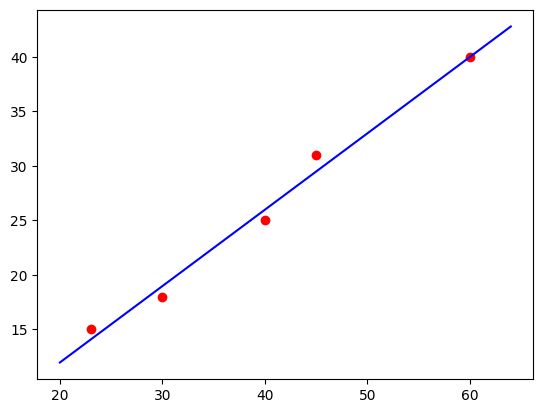

In [13]:
# 예측선 시각화
plt.scatter(age, drugB, color='red')

x = np.arange(20,65, 1)
y = a*x + b     # 예측을 위한 직선방정식
plt.plot(x,y,'b')
plt.show()

# seaborn으로 산점도/회귀선 시각화
+ lmplot(x,y,data,ci여부)

In [14]:
drugs = pd.DataFrame({'age':age,'drugA':drugA,'drugB':drugB})

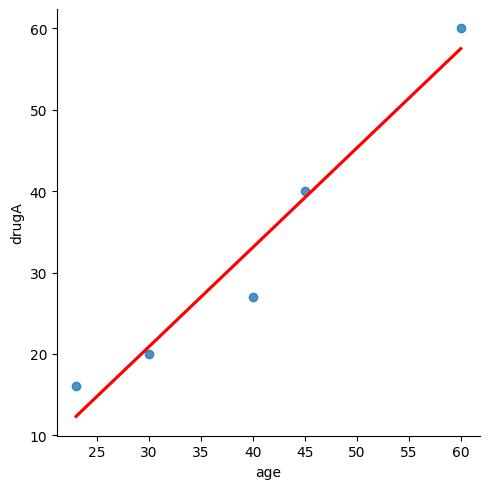

In [15]:
sns.lmplot(x='age',y='drugA', data=drugs, ci=None, line_kws={'color':'red'})
plt.show()

### 신생아 월별 몸무게 추이

In [48]:
age = [1,3,5,2,11,9,3,9,12,3]
weight = [4.4,5.3,7.2,5.2,8.5,7.3,6.0,10.4,10.2,6.1]

In [49]:
a, b = np.polyfit(age,weight,1).round(2)
a,b

(0.47, 4.36)

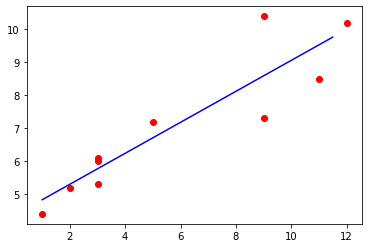

In [52]:
# 예측선 시각화
plt.scatter(age, weight, color='red')

x = np.arange(1,12, 0.5)
y = a*x + b    # 예측을 위한 직선방정식
plt.plot(x,y,'b')
plt.show()

### tips 데이터셋에서 총지불금액별 팁금액에 대한 관계

In [9]:
tips = sns.load_dataset('tips')

In [12]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [33]:
a, b = np.polyfit(tips.total_bill,tips.tip,1).round(2)
a,b

(0.11, 0.92)

In [26]:
np.min(tips.total_bill)

3.07

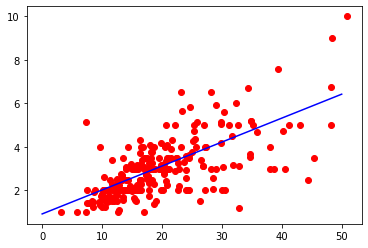

In [27]:
# 예측선 시각화
plt.scatter(tips.total_bill, tips.tip, color='red')

x = np.arange(0,55, 5)
y = 0.11*x + 0.92     # 예측을 위한 직선방정식
plt.plot(x,y,'b')
plt.show()

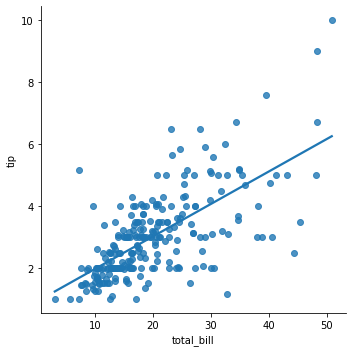

In [54]:
sns.lmplot(x='total_bill',y='tip', data = tips, ci=None)
plt.show()

## 다이아몬드 캐럿당 가격에 대한 시각화
+ <img src='img/diamonds.png' width='50%' height='50%'>

In [8]:
diamonds = sns.load_dataset('diamonds')

In [18]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [62]:
a, b = np.polyfit(diamonds.carat,diamonds.price,1).round(2)
print(a,b)

mx = np.max(diamonds.carat)
mn = np.min(diamonds.carat)
print(mx,mn)

7756.43 -2256.36
5.01 0.2


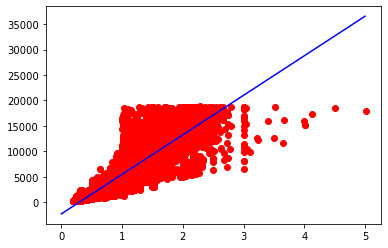

In [63]:
# 예측선 시각화
plt.scatter(diamonds.carat, diamonds.price, color='red')

x = np.arange(0.0,5.5, 0.5)
y = a*x + b    # 예측을 위한 직선방정식
plt.plot(x,y,'b')
plt.show()

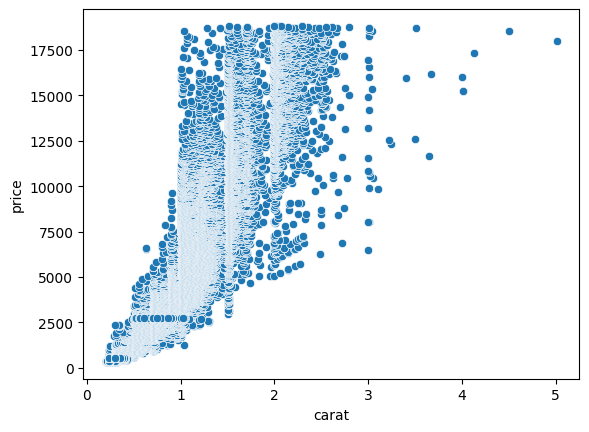

In [19]:
sns.scatterplot(data=diamonds, x='carat', y='price')
plt.show()

## depth에 따른 가격 비교

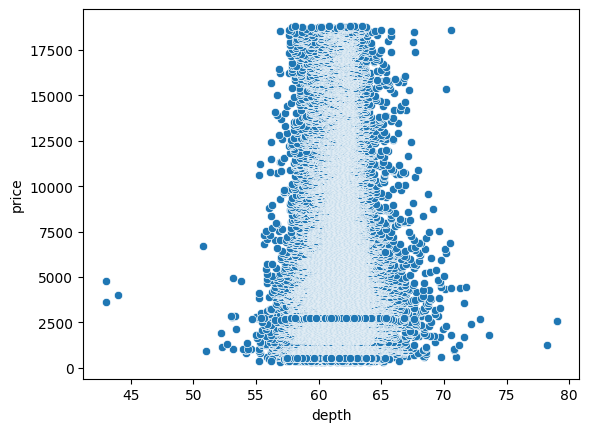

In [20]:
sns.scatterplot(data=diamonds, x='depth', y='price')
plt.show()

### 윗면 면적table에 따른 가격 비교
+ table : 다이아몬드 위 팔각형 대각 직경

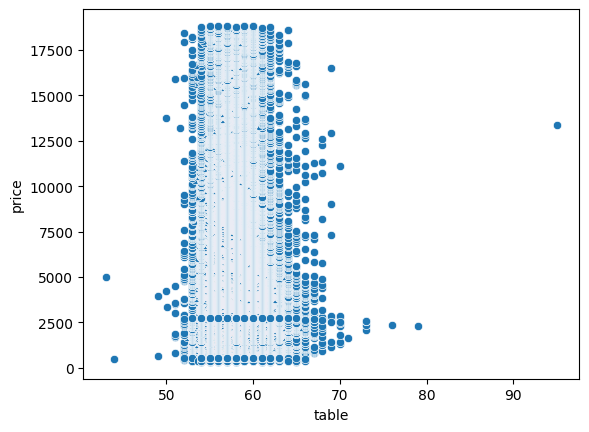

In [21]:
sns.scatterplot(data=diamonds, x='table', y='price')
plt.show()

# 다변량 분석
* 여러 현상이나 사건에 대한 측정치를 개별적으로 분석하지 않고 한번에 동시에 분석하는 기법
* 2차원 데이터를 이용해서 먼저 시각화한 뒤 새로운 변수를 기준으로 색상을 표현함으로써 새로운 차원을 통한 분석 가능 
* 범주형 데이터에 다변량 분석시에는 qualitative palette에 따른 색상을 사용하는 것이 좋음
* 정량적 데이터에 다변량 분석시에는 sequential palette에 따른 색상을 사용하는 것이 좋음
* 칼라맵 : https://matplotlib.org/stable/tutorials/colors/colormaps.html

### 성별 기준 총지불금액별 팁에 대한 관계 시각화

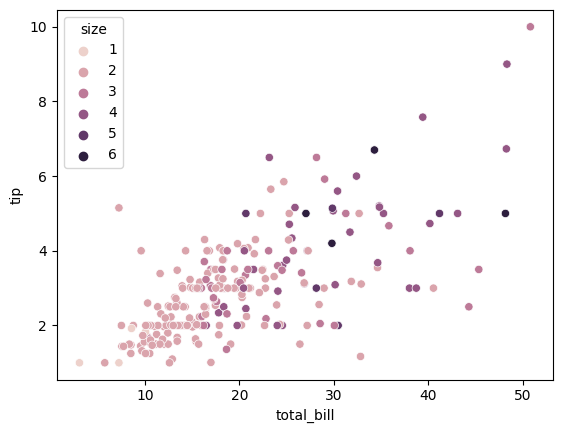

In [21]:
# seaborn에서는 hue라는 속성을 이용해서 다변량 분석 가능
# scatterplot(x,y,hue)
colors = sns.set_palette('Paired')
sns.scatterplot(data=tips, x='total_bill',y='tip', hue='size')
plt.show()

In [ ]:
# 다이아몬드 색상
# D E F : Colorless
# G H I J : Near Colorless
# K L M : Faint (거의 시공안함)
# N O P Q R : Very Light (거의 시공안함)
# S T U V W X Y Z : Light (거의 시공안함)

In [ ]:
# 다이아몬드 흠집정도
# FL (Flawless) : 다이아몬드 내외에 아무런 결점이 없이 거의 완벽한 상태
# IF (Internally Flawless) : 다이아몬드 내부에는 아무런 결점이 없고, 외부의 미세한 결점이 존재 하는 상태
# VVS1, VVS2 (Very Very Slightly Included) : 10배 확대 검사시 바로 확인하기 힘든 미세한 인클루전을 포함한다.
# VS1, VS2 (Very Slightly Included) : 10배 확대 검사시 발견이 가능하며, 페이스업 상태로 내포물이 보이지 않는정도.
# SI1, SI2 (Slightly Included) : 10배 확대 검사시 쉽게 발견이되며, 페이스업 상태로 내포물이 보인다.
# I1, I2, I3 (Imperfect) : 10배 확대 검사시 바로 발견이되며, 종종 육안으로도 보인다.

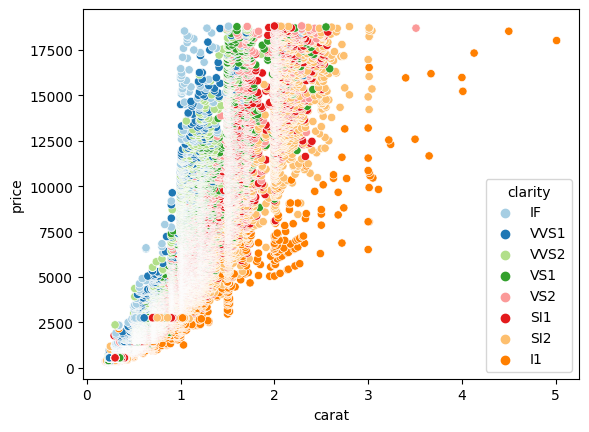

In [22]:
## 다이아몬드 캐럿당 가격에 대한 다변량 분석
colors = sns.set_palette('Paired')
sns.scatterplot(data=diamonds, x='carat',y='price', hue='clarity', color=colors)
plt.show()

In [23]:
## 타이타닉 승객 생존에 대한 다변량 분석
titanic = sns.load_dataset('titanic')

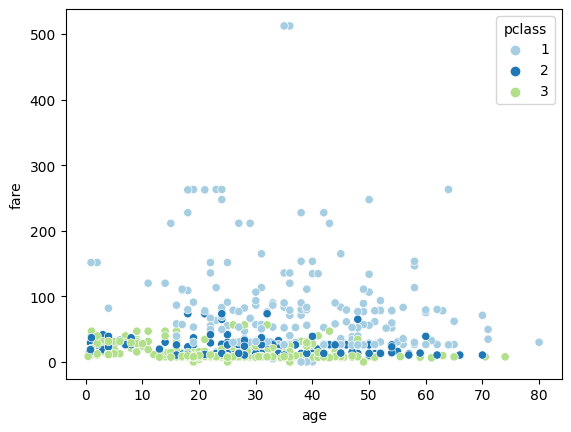

In [28]:
sns.scatterplot(data=titanic, x='age',y='fare', hue='pclass', palette='Paired')
plt.show()

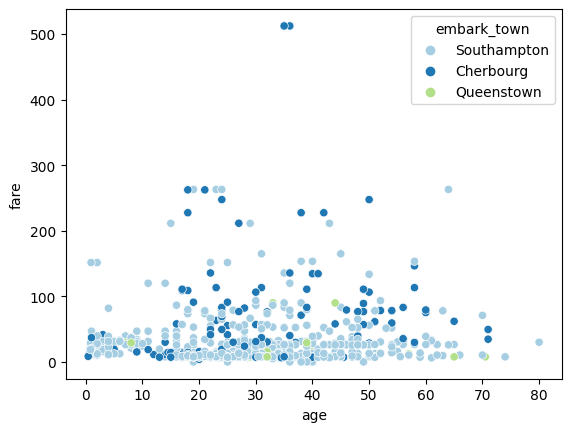

In [29]:
sns.scatterplot(data=titanic, x='age',y='fare', hue='embark_town', palette='Paired')
plt.show()

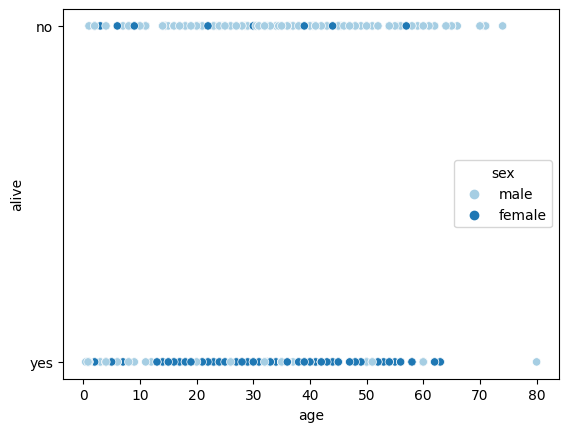

In [32]:
sns.scatterplot(data=titanic, x='age',y='alive', hue='sex')
plt.show()

## matplotlib 으로 다변량 분석 그래프 시각화
+ 분석대상 컬럼은 반드시 숫자여야 함
+ 색상지정시 color 속성이 아닌 c속성을 이용

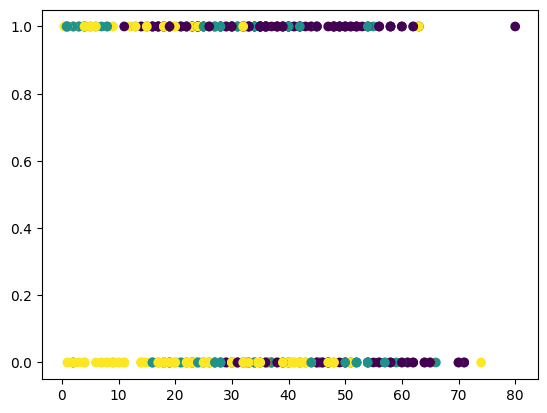

In [36]:
plt.scatter(titanic.age,titanic.survived, c=titanic.pclass)
plt.show()

In [41]:
# 성별 컬럼이 문자이므로 숫자로 변환하는 함수 정의
def getGender(x):
    gender = 0
    if x == 'male' : gender = 1
    return gender 

In [39]:
titanic['gender'] = titanic.sex.apply(lambda x: getGender(x))
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,gender
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


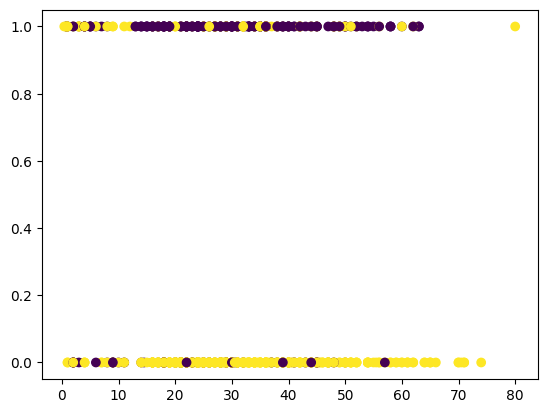

In [40]:
plt.scatter(titanic.age,titanic.survived, c=titanic.gender)
plt.show()